## Solving the Lane-Emden Equation Numerically

### The Lane-Emden Equation
The Lane-Emden equation is given by:
$$
\frac{1}{\xi^2} \frac{d}{d\xi} \left( \xi^2 \frac{d\theta}{d\xi} \right) = -\theta^n
$$
with boundary conditions at the center of the star:
$$
\theta(\xi=0) = 1 \quad \text{and} \quad \left.\frac{d\theta}{d\xi}\right|_{\xi=0} = 0.
$$

Here, $\theta^n$ represents the scaled density, and $\xi$ represents the scaled radius when the equation of state is expressed as $P = K\rho^{1+1/n}$.

### Relations for Physical Quantities
We have the following relations:
$$
\rho = \rho_c \theta^n, \quad P = P_c \theta^{n+1}, \quad T = T_c \theta^n.
$$

The central density, pressure, and temperature are given by:
$$
\rho_c = a_n \frac{3M}{4\pi R^3}, \quad a_n = -\xi_1^3 \left( \left.\frac{d\theta}{d\xi}\right|_{\xi=\xi_1} \right)^{-1},
$$
$$
P_c = c_n \frac{GM^2}{R^4}, \quad c_n = \left( \left.\frac{d\theta}{d\xi}\right|_{\xi=\xi_1} \right)^{-2},
$$
$$
T_c = b_n \frac{GM}{\mu m_H k_B R}, \quad b_n = \left[ (n+1)\xi_1 \left( -\left.\frac{d\theta}{d\xi}\right|_{\xi=\xi_1} \right) \right]^{-1}.
$$

Here, $\xi_1$ corresponds to the value of $\xi$ where $\theta(\xi) = 0$. The radial scaling is defined as:
$$
r = \alpha \xi, \quad \alpha = \sqrt{\frac{(n+1)K \rho_c^{1/n - 1}}{4\pi G}},
$$
where:
$$
K = \frac{(4\pi)^{1/n} G}{(n+1)\xi_1^{(n+1)/n} \left( -\left.\frac{d\theta}{d\xi}\right|_{\xi=\xi_1} \right)^{(1-n)/n}} M^{(n-1)/n} R^{(3-n)/n}.
$$

### Numerical Algorithm for Solving the Lane-Emden Equation

#### Step 1: Rewrite the Lane-Emden Equation
Rewrite the equation as:
$$
\frac{d^2\theta}{d\xi^2} = -\frac{2}{\xi} \frac{d\theta}{d\xi} - \theta^n.
$$

#### Step 2: Approximate Derivatives
Approximate derivatives as:
$$
\frac{d\theta}{d\xi} \approx \frac{\Delta\theta}{\Delta\xi}, \quad \frac{d^2\theta}{d\xi^2} \approx \frac{1}{\Delta\xi} \Delta\left(\frac{d\theta}{d\xi}\right).
$$

#### Step 3: Discretize the Radius
Divide the radius into discrete points $\xi_0, \xi_1, \xi_2, \dots$, with $\Delta\xi = \xi_{i+1} - \xi_i$. Define:
$$
\left(\frac{d\theta}{d\xi}\right)_{i+1} = \left(\frac{d\theta}{d\xi}\right)_i - \Delta\xi \left[\frac{2}{\xi_i} \left(\frac{d\theta}{d\xi}\right)_i + \theta_i^n\right],
$$
$$
\theta_{i+1} = \theta_i + \Delta\xi \left(\frac{d\theta}{d\xi}\right)_{i+1}.
$$

#### Step 4: Boundary Conditions
Start with:
$$
\xi_0 = 10^{-6}, \quad \Delta\xi = 10^{-3}, \quad \theta_0 = 1.0, \quad \left(\frac{d\theta}{d\xi}\right)_0 = 0.0.
$$

Step outwards iteratively until $\theta_{i+1} < 0$, indicating the surface of the star ($\theta = 0$).

#### Step 5: Interpolation for $\xi_1$
Use linear interpolation between the last two points $(\xi_i, \theta_i)$ and $(\xi_{i+1}, \theta_{i+1})$ to find $\xi_1$ where $\theta = 0$:
$$
\xi_1 = \xi_i - \theta_i \cdot \frac{\xi_{i+1} - \xi_i}{\theta_{i+1} - \theta_i}.
$$

#### Step 6: Compute Physical Constants
Using $\xi_1$ and $\left.\frac{d\theta}{d\xi}\right|_{\xi=\xi_1}$, calculate $\rho_c$, $P_c$, $T_c$, and $K$.

#### Step 7: Generate Radial Profiles
Using the calculated values, generate profiles for $\rho(r)$, $P(r)$, $T(r)$, and $L(r)$:
$$
\rho(r) = \rho_c \theta^n, \quad P(r) = P_c \theta^{n+1}, \quad T(r) = T_c \theta^n,
$$
$$
L(r) = \int_0^r \varepsilon_{pp}(r') \cdot 4\pi r'^2 \rho(r') \, dr',
$$
where:
$$
\varepsilon_{pp} = 2.6 \times 10^{-37} X^2 \rho T^4.
$$

### Validation and Comparison
Compare the results for $\rho$, $P$, $T$, and $L$ with the Standard Solar Model for a polytrope with $n = 3.3$.

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Physical constants (SI units)
G = 6.67430e-11
M_sun = 1.9885e30
R_sun = 6.9634e8
mu = 0.6  # Mean molecular weight for solar composition
mH = 1.6735575e-27
kB = 1.380649e-23

# Polytropic index and numerical parameters
n = 3.3
xi0 = 1e-6
delta_xi = 1e-3

In [3]:
# Initialize variables
xi = xi0
theta = 1.0
dtheta_dxi = 0.0
xi_values = [xi]
theta_values = [theta]
dtheta_values = [dtheta_dxi]

In [4]:
# Numerical integration until theta crosses zero
while True:
    # Update derivative and theta
    dtheta_new = dtheta_dxi - delta_xi * (2/xi * dtheta_dxi + theta**n)
    theta_new = theta + delta_xi * dtheta_new
    xi_new = xi + delta_xi
    
    # Store values
    xi_values.append(xi_new)
    theta_values.append(theta_new)
    dtheta_values.append(dtheta_new)
    
    # Check termination condition
    if theta_new < 0:
        break
    
    # Update for next iteration
    xi = xi_new
    theta = theta_new
    dtheta_dxi = dtheta_new

In [5]:
# Linear interpolation to find xi_1 where theta=0

# Extract the last two computed values of xi
xi_prev = xi_values[-2]  # Second-to-last xi value
xi_final = xi_values[-1]  # Last xi value

# Extract the corresponding theta values
theta_prev = theta_values[-2]  # Theta at xi_prev
theta_final = theta_values[-1]  # Theta at xi_final (should be negative since we've crossed theta=0)

# Perform linear interpolation to find xi_1, the point where theta=0
# The formula is derived from the equation of a straight line:
# xi_1 = xi_prev - (theta_prev * slope), where slope = (xi_final - xi_prev) / (theta_final - theta_prev)
xi_1 = xi_prev - theta_prev * (xi_final - xi_prev) / (theta_final - theta_prev)

# Similarly, interpolate to find the derivative d(theta)/d(xi) at xi_1
# Use the linear interpolation formula for d(theta)/d(xi):
# dtheta_1 = dtheta_prev + (slope_dtheta * distance_to_xi_1), where slope_dtheta = (dtheta_final - dtheta_prev) / (xi_final - xi_prev)
dtheta_1 = dtheta_values[-2] + (dtheta_values[-1] - dtheta_values[-2]) * (xi_1 - xi_prev) / (xi_final - xi_prev)

In [6]:
# Calculate physical constants
a_n = -xi_1**3 / dtheta_1
rho_c = a_n * 3*M_sun / (4*np.pi*R_sun**3)

c_n = 1 / dtheta_1**2
P_c = c_n * G*M_sun**2 / R_sun**4

b_n = 1 / ((n+1)*xi_1*(-dtheta_1))
T_c = b_n * G*M_sun*mu*mH / (kB*R_sun)

K = (4*np.pi)**(1/n) * G / ((n+1)*xi_1**((n+1)/n)*(-dtheta_1)**((1-n)/n)) * \
    M_sun**((n-1)/n) * R_sun**((3-n)/n)

alpha = np.sqrt((n+1)*K * rho_c**(1/n - 1)/(4*np.pi*G))

In [7]:
# Generate radius values and profiles
r_values = np.array(xi_values[:-1]) * alpha  # Exclude last point beyond xi_1
rho_profile = rho_c * np.array(theta_values[:-1])**n
P_profile = P_c * np.array(theta_values[:-1])**(n+1)
T_profile = T_c * np.array(theta_values[:-1])**n

In [8]:
# Constants for luminosity calculation
X = 0.7  # Hydrogen mass fraction
epsilon_pp = 2.6e-37 * X**2 * np.array(rho_profile) * np.array(T_profile)**4

# Initialize luminosity array
L_profile = []
dL_dr = []

# Integrate luminosity using trapezoidal rule
L_cumulative = 0.0
for i in range(len(r_values) - 1):
    # The formula for dL is: dL = ε_pp * 4πr^2 * ρ * dr
    # Where:
    #   ε_pp[i] = energy generation rate at radius r_values[i]
    #   4πr^2 = surface area of the spherical shell at radius r_values[i]
    #   ρ_profile[i] = density at radius r_values[i]
    #   (r_values[i+1] - r_values[i]) = thickness of the shell (dr)
    dL = epsilon_pp[i] * 4 * np.pi * r_values[i]**2 * rho_profile[i] * (r_values[i+1] - r_values[i])
    L_cumulative += dL
    L_profile.append(L_cumulative)
    dL_dr.append(dL)

# Append final value for consistency
L_profile.append(L_cumulative)

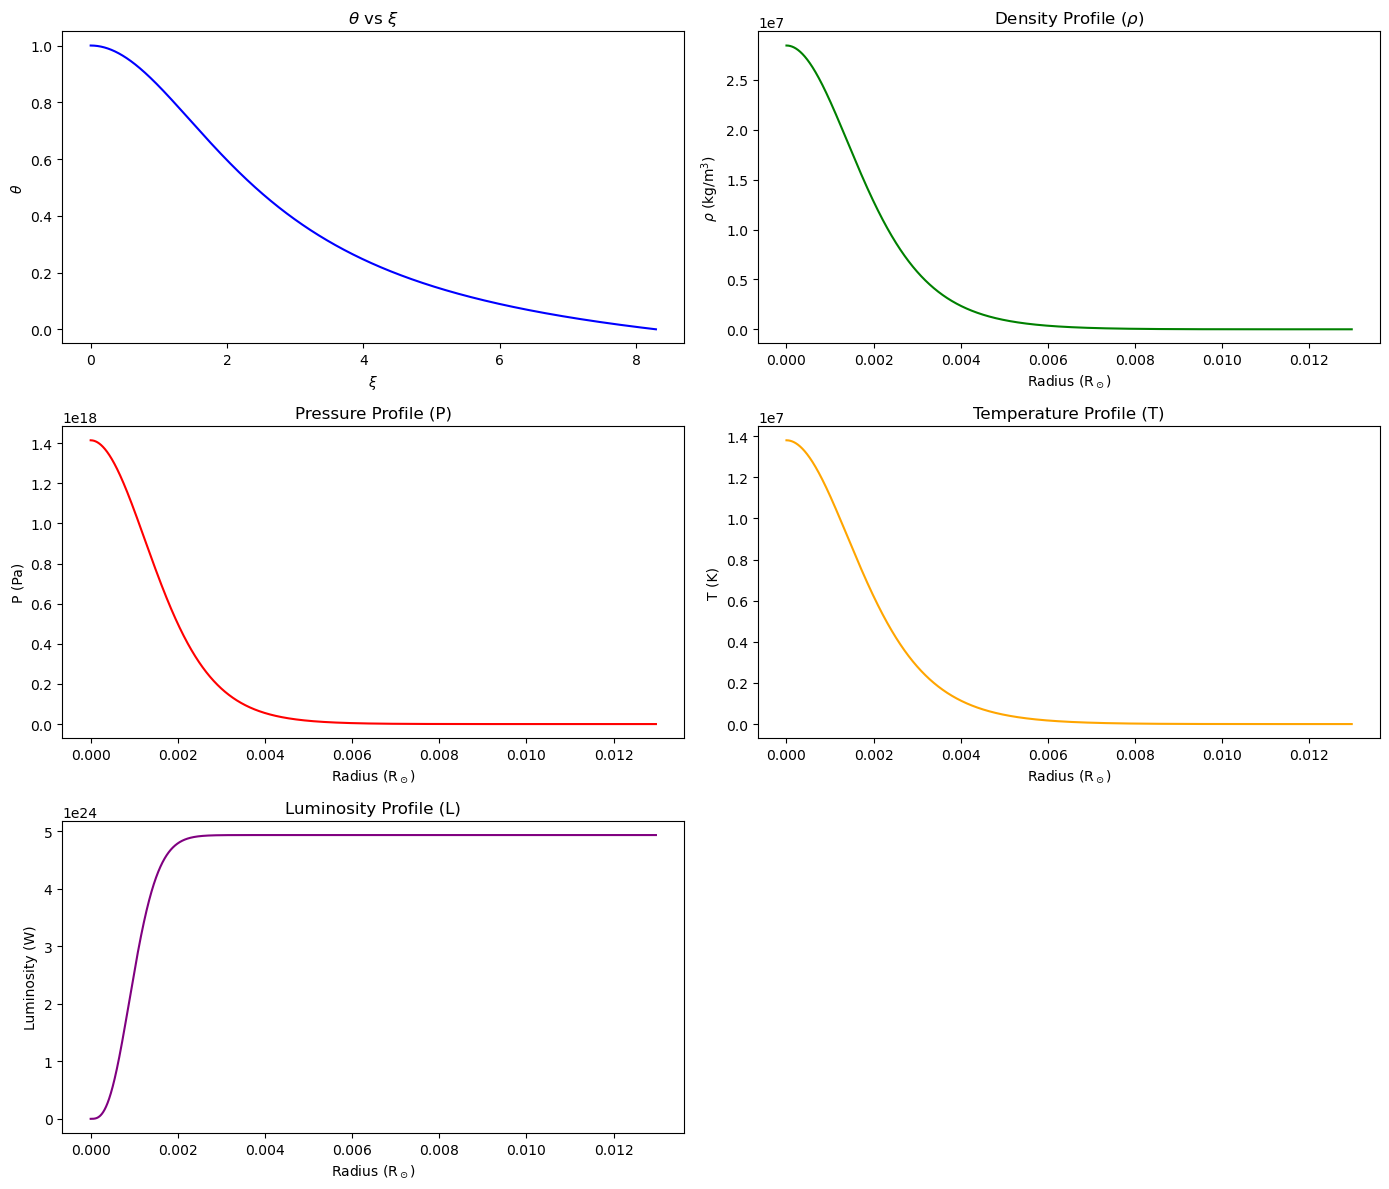

In [9]:
# Create subplots
fig, axs = plt.subplots(3, 2, figsize=(14, 12))
axs = axs.flatten()

# Theta vs xi
axs[0].plot(xi_values[:-1], theta_values[:-1], color='blue')
axs[0].set_title(r'$\theta$ vs $\xi$', fontsize=12)
axs[0].set_xlabel(r'$\xi$', fontsize=10)
axs[0].set_ylabel(r'$\theta$', fontsize=10)

# Density profile
axs[1].plot(r_values/R_sun, rho_profile, color='green')
axs[1].set_title(r'Density Profile ($\rho$)', fontsize=12)
axs[1].set_xlabel(r'Radius (R$_\odot$)', fontsize=10)
axs[1].set_ylabel(r'$\rho$ (kg/m$^3$)', fontsize=10)

# Pressure profile
axs[2].plot(r_values/R_sun, P_profile, color='red')
axs[2].set_title('Pressure Profile (P)', fontsize=12)
axs[2].set_xlabel(r'Radius (R$_\odot$)', fontsize=10)
axs[2].set_ylabel('P (Pa)', fontsize=10)

# Temperature profile
axs[3].plot(r_values/R_sun, T_profile, color='orange')
axs[3].set_title('Temperature Profile (T)', fontsize=12)
axs[3].set_xlabel(r'Radius (R$_\odot$)', fontsize=10)
axs[3].set_ylabel('T (K)', fontsize=10)

# Luminosity profile
axs[4].plot(r_values[:-1]/R_sun, L_profile[:-1], color='purple')
axs[4].set_title('Luminosity Profile (L)', fontsize=12)
axs[4].set_xlabel(r'Radius (R$_\odot$)', fontsize=10)
axs[4].set_ylabel('Luminosity (W)', fontsize=10)

# Hide unused subplot
axs[5].axis('off')

# Adjust layout and show plots
plt.tight_layout()
plt.show()